# 1. Perkenalan
1. Nama : Cindra Chatami
2. Batch : 9 FTDS

Dataset yang digunakan didapatkan dari [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) dengan menggunakan folder `bank-additional` dan file `bank-additional.csv`. 

Data ini merupakan data dari campaign bank di Portugis sebuah product dari bulan May 2008 - November 2010. Campaign ini dilakukan dengan phone calls untuk mencari tahu apakah client akan melakukan subscribe pada deposit bank (Yes or No).

Milestone kali ini akan membuat 7 model untuk memprediksi apakah client akan melakukan subs/tidak berdasarkan dataset yang ada. Model tersebut adalah LogisticRegression, Support Vector Machine, Decision Tree, Random Forest, KNN, Naive Bayes, dan Gradient Boosting dan menggunakan Hyperparamter terbaiknya dengan bantuan GridSearchCV. 

# 2. Import Libraries

In [1]:
#untuk EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#untuk preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.preprocessing import  MinMaxScaler, FunctionTransformer, PowerTransformer



#untuk model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
pd. set_option('display.max_columns', None) #konfigurasi dilakukan agar dapat melihat semua kolom

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


bank client data:
1.  age (numeric)
2.  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  default: has credit in default? (categorical: 'no','yes','unknown')
6.  housing: has housing loan? (categorical: 'no','yes','unknown')
7.  loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8.  contact: contact communication type (categorical: 'cellular','telephone')
9.  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.  day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  previous: number of contacts performed before this campaign and for this client (numeric)
15.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16.  emp.var.rate: employment variation rate - quarterly indicator (numeric)
17.  cons.price.idx: consumer price index - monthly indicator (numeric)
18.  cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21. y: has the client subscribed a term deposit? (binary: 'yes','no')

# EDA

In [5]:
#melihat deskriptif data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


> Rata-rata umur pada dataset ini adalah 40 tahun, perlu di cek max value pada umur

> colom campaign memiliki nilai max yang jauh dari nilai rata-ratanya, hal ini perlu di cek lebih jauh apakah data tersebut outlier/bukan

> kolom nr.employed memiliki nilai 75% dan max yang sama, kemungkinan data ini adalah data outliers yang sudah dilakukan `capping`

> kolom durasi hanya berarti ketika telepon di angkat, kolom ini tidak terlalu berfungsi dalam dataset ini

> rata-rata tiap customer dikontak oleh marketing 2x (kolom campaign), perlu di cek max value pada kolom campaign adalah outlier atau bukan

> pdays 999 berarti client tersebut `tidak dihubungi` oleh perusahaan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

> - terdapat 41188  entries pada data
> - kolom default, housing, loan, target(y) masih dalam bentuk object yang perlu dirubah menjadi int untuk mempermudah analisis (Yes = 1, No = 0)



In [7]:
#merubah tipe object menjadi int untuk mempermudah analisis dan model
df['y'] = (df['y'] == 'yes').astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
#merubah nama kolom agar lebih mudah dipahami
df = df.rename({'y' : 'deposit', 'default' : 'credit'}, axis=1)

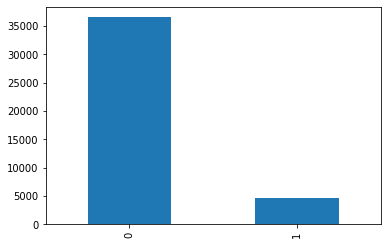

In [10]:
df.deposit.value_counts().plot(kind='bar')

> Data imbalance antara deposit dan tidak deposit

## Distribusi Data Dari Kolom Numeric

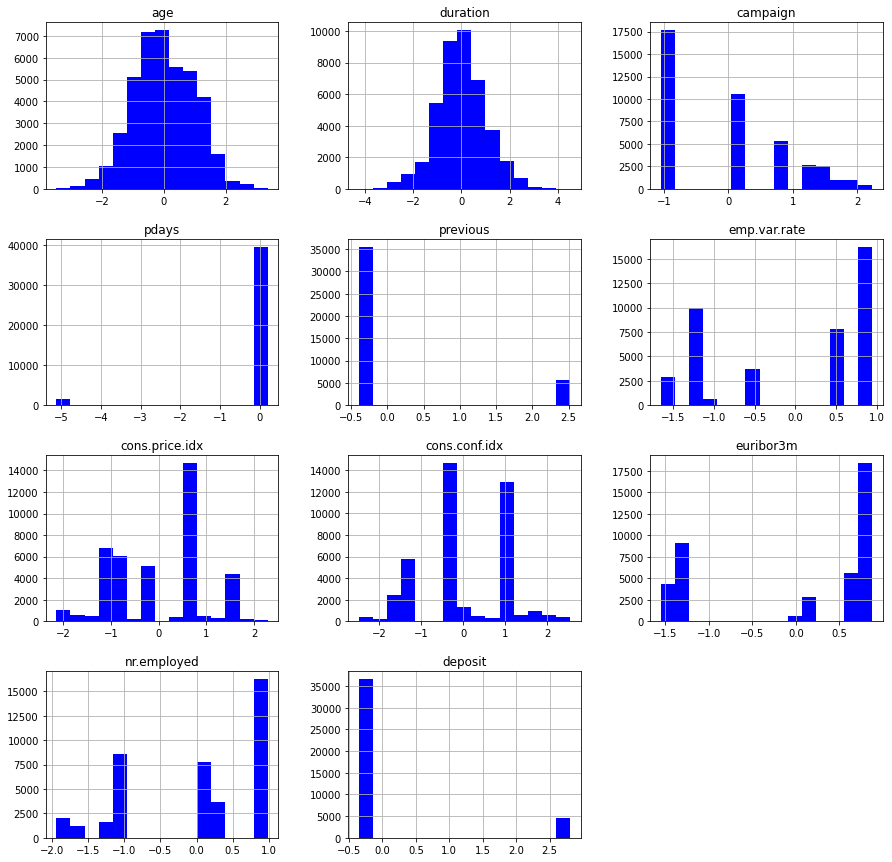

In [11]:
df_numeric = df.select_dtypes(include=np.number)
columns = df_numeric.columns
df_numeric = PowerTransformer().fit_transform(df_numeric)
df_numeric = pd.DataFrame(df_numeric, columns= columns)
df_numeric.hist(bins=15, figsize=(15,15), color='blue');

> - tidak ada data yang terdistribusi dengan normal
> - data imbalance antara target yes dengan no

## Cardinality

In [12]:
cardinal = df.select_dtypes(include='object')
for uniq in cardinal : 
  print(f'jumlah cardinality pada kolom {uniq} : ',len(cardinal[uniq].unique()))

jumlah cardinality pada kolom job :  12
jumlah cardinality pada kolom marital :  4
jumlah cardinality pada kolom education :  8
jumlah cardinality pada kolom credit :  3
jumlah cardinality pada kolom housing :  3
jumlah cardinality pada kolom loan :  3
jumlah cardinality pada kolom contact :  2
jumlah cardinality pada kolom month :  10
jumlah cardinality pada kolom day_of_week :  5
jumlah cardinality pada kolom poutcome :  3


Cardinality terbanyak ada pada kolom job, month, dan education. Namun kolom bulan tidak dapat dilakukan pengelompokan/pengurangan cardinality. Maka akan dilakukan untuk mengurangi cardinality pada kolom education & job saja.

In [13]:
#cek unique value dari kolom education
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [14]:
#cek unqiue value dari kolom job
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

> Cardinality pada kolom job & education masih bisa disederhanakan berdasarkan sumber berikut :

>> Kolom job akan dikelompokan berdasarkan [collarnya](https://en.wikipedia.org/wiki/Designation_of_workers_by_collar_color)

>> Kolom education akan dikelompokan menjadi basic saja https://en.wikipedia.org/wiki/Education_in_Portugal

In [15]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [16]:
df['education'].replace({'basic.4y' : 'basic.education', #pengelompokan kolom education
                          'basic.9y' : 'basic.education', 
                         'basic.6y' : 'basic.education'    
}, inplace=True)

df['collar'] = df['job'].replace({ 'admin.' : 'white collar', 'blue-collar' : 'blue collar', #pengelompokan kolom job
                                  'technician' : 'grey collar','services' : 'pink collar',
                                  'management' : 'white collar', 'entrepreneur' :'white collar',
                                  'self-employed' : 'white collar', 'housemaid' : 'blue collar',
                                  'student' : 'unemployed'
                                  })

## Korelasi Feature Dengan label

In [17]:
_df = df.copy() #korelasi dilihat dengan menggunakan data frame yg berbeda agar tidak merusak dataset yg asli
_df[['housing','loan','credit']] = (_df[['housing','loan','credit']] == 'yes').astype(int)
 #housing, loan, dan credit dirubah menjadi angka 0/1 agar dapat dilihat relasinya dengan kolom target

Text(0.5, 1.0, 'Korelasi Feature Terhadap Target (Deposit)')

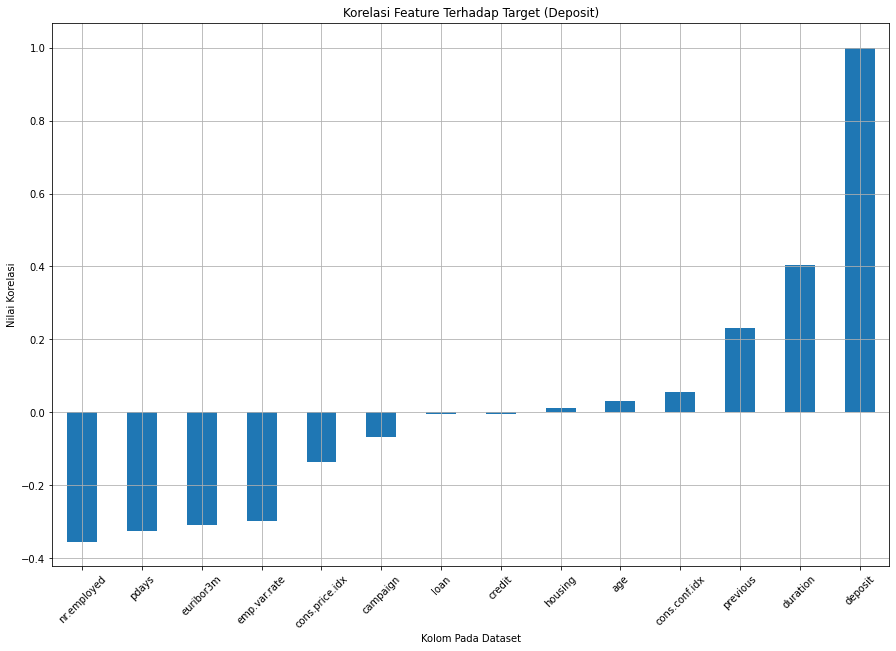

In [18]:
plt.subplots(figsize=(15, 10))
_corr = _df.corr()['deposit'].sort_values()
_corr.plot(kind='bar')
plt.xticks(rotation=45)
plt.grid()
plt.xlabel('Kolom Pada Dataset')
plt.ylabel('Nilai Korelasi')
plt.title('Korelasi Feature Terhadap Target (Deposit)')


> Berdasarkan plot correlation, yang berkorelasi dengan deposit adalah nr.employed, pdays, euribor3m, emp.var.rat, cons.price.idx, campaign, age, cons.conf.idx, previous, & duration

## Korelasi Antar Feature

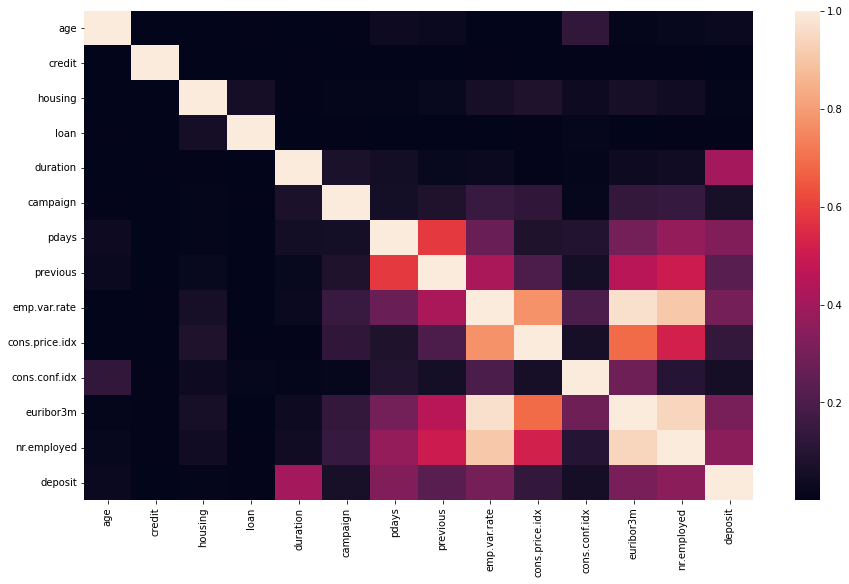

In [19]:
plt.figure(figsize=(15,9))
sns.heatmap(_df.corr().abs())

> - Semakin terang kotak pada plot menunjukkan bahwa kolom tersebut menunjukkan angka yang sama yang menunjukkan bahwa kolom ini tidak independen. Pada heatmap kali ini, semua feature sudah independen karena tidak ada yang menunjukkan warna dengan terang yang sama.
> - Kolom yang lain tidak menunjukkan korelasi, berarti setiap kolom pada data ini adalah independent.
> - Kolom yang berwarna gelap berarti kolom tersebut tidak memiliki korelasi (sangat rendah) terhadap kolom target (deposit)

## Korelasi Tingkat Edukasi Dengan Deposit

Text(0, 0.5, 'Rata-Rata Client Yang Deposit')

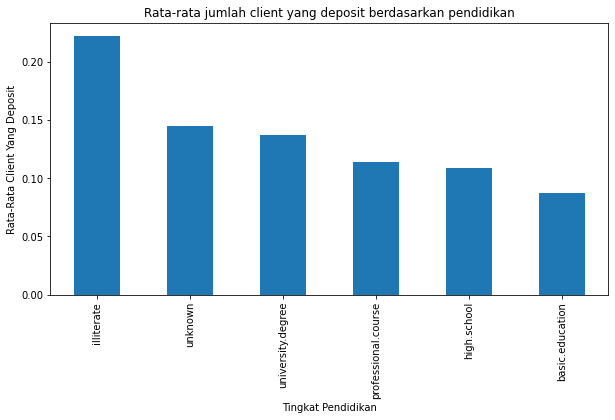

In [20]:
educ = df.groupby('education').mean()['deposit'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5),
                                                                            title = 'Rata-rata jumlah client yang deposit berdasarkan pendidikan')
educ.set_xlabel('Tingkat Pendidikan')
educ.set_ylabel('Rata-Rata Client Yang Deposit')
#menggunakan .mean() agar yang di-plot adalah rata-rata orang yang melakukan deposit (karena nilai yes bernilai 1)

> Secara Urutan, yang memiliki kemungkinan lebih besar untuk melakukan deposit adalah illiterate, unknown, university degree, professional curse, highschool, dan basic education

Jika dilakukan pengurutan, apakah kolom education akan memiliki kontribusi tinggi terhadap fitur? 

In [21]:
df['educ_'] = df['education'].replace({
    'basic.education' : 1,
    'high.school' : 2,
    'professional.course' : 3,
    'university.degree' : 4,
    'unknown' : 5,
    'illiterate':6,
})

In [22]:
df.corr()['deposit'].sort_values()

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
educ_             0.064668
previous          0.230181
duration          0.405274
deposit           1.000000
Name: deposit, dtype: float64

> Kolom education hanya memiliki korelasi sebesar 0.06 (kecil). Artinya, tingkat pendidikan client tidak mempengaruhi keputusan client untuk melakukan deposit meskipun sudah diurutkan

## Korelasi Deposit Dengan Pekerjaan

Text(0, 0.5, 'Rata-Rata Client Yang Deposit')

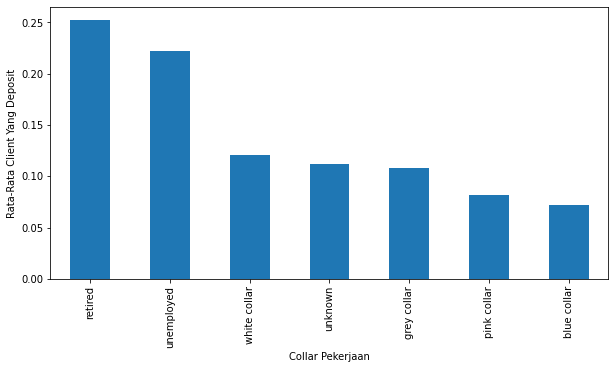

In [23]:
jobs = df.groupby('collar').mean()['deposit'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
jobs.set_xlabel('Collar Pekerjaan')
jobs.set_ylabel('Rata-Rata Client Yang Deposit')
#menggunakan .mean() agar yang di-plot adalah rata-rata orang yang melakukan deposit (karena nilai deposit bernilai 1)

> Dilihat dari gambarnya, pekerjaan yang cenderung memiliki probabilitas untuk melakukan deposit adalah `student, retired, unemployed, white collar, unknown,grey collar, pink collar, dan terakhir blue collar`. Namun hanya pekerjaan `admin` yang memiliki probabilitas terbesar  utnuk melakukan deposit

apakah kolom job akan berkorelasi tinggi pada deposit jika dilakukan peng-urutan?

In [24]:
df['job_']=df['collar'].replace({
    'blue collar': 1,
    'pink collar' : 2,
    'grey collar' : 3,
    'unknown' : 4,
    'white collar' : 5,
    'unemployed' : 6,
    'retired' : 7
    })

In [25]:
df.corr()['deposit'].sort_values

<bound method Series.sort_values of age               0.030399
duration          0.405274
campaign         -0.066357
pdays            -0.324914
previous          0.230181
emp.var.rate     -0.298334
cons.price.idx   -0.136211
cons.conf.idx     0.054878
euribor3m        -0.307771
nr.employed      -0.354678
deposit           1.000000
educ_             0.064668
job_              0.114374
Name: deposit, dtype: float64>

> Kolom job memiliki korelasi yang besar setelah diurutkan yaitu 0.1 terhadap target. Artinya, pekerjaan client akan berpengaruh pada keputusan client untuk deposit/tidak

## Korelasi Deposit Dengan Status Perkawinan

Text(0, 0.5, 'Rata-Rata Client Yang Deposit')

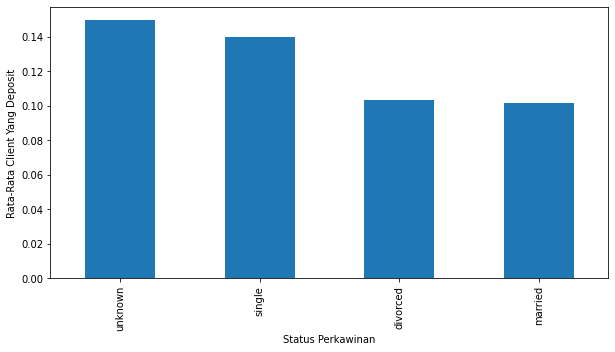

In [26]:
marital = df.groupby('marital').mean()['deposit'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
marital.set_xlabel('Status Perkawinan')
marital.set_ylabel('Rata-Rata Client Yang Deposit')
#menggunakan .mean() agar yang di-plot adalah rata-rata orang yang melakukan deposit (karena nilai deposit bernilai 1)

> Dilihat dari histogramnya, client dengan status pernikahan `unknown` cenderung melakukan deposit (ada tingkatan korelasi). Namun apakah hal tersebut berpengaruh signifikan ?

In [27]:
df['marital_'] = df['marital'].replace({
    'married' : 1,
    'divorced' : 2,
    'single' : 3,
    'unknown' :4})

In [28]:
df.corr()['deposit'].sort_values()

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
marital_          0.051717
cons.conf.idx     0.054878
educ_             0.064668
job_              0.114374
previous          0.230181
duration          0.405274
deposit           1.000000
Name: deposit, dtype: float64

> Marital hanya memiliki korelasi sebesar 0.05 (kecil) terhadap target. Artinya status pernikahan client tidak mempengaruhi keputusan client untuk melakukan deposit

## Korelasi Deposit Jenis Komunikasi

Text(0, 0.5, 'jumlah client yang melakukan deposit')

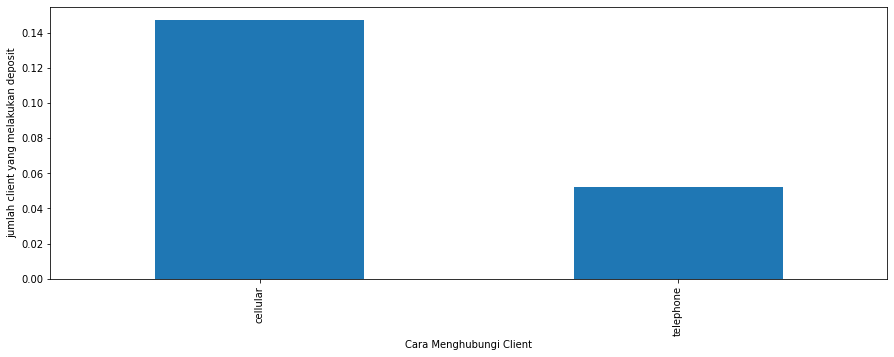

In [29]:
df.groupby('contact')['deposit'].mean().plot(kind='bar',figsize=(15,5))
plt.xlabel('Cara Menghubungi Client')
plt.ylabel('jumlah client yang melakukan deposit')
#menggunakan .mean() agar yang di-plot adalah rata-rata orang yang melakukan deposit (karena nilai deposit bernilai 1)

> Client yang dihubungi melalui cellular cenderung melakukan deposit. Namun apakah hal itu signifikan terhadap korelasinya ?

In [30]:
#jika kolom contact diberikan tingkat
df['contact_'] = df['contact'].replace({
    'telephone' : 1, 'cellular' : 2
})

In [31]:
df.corr()['deposit'].sort_values()

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
marital_          0.051717
cons.conf.idx     0.054878
educ_             0.064668
job_              0.114374
contact_          0.144773
previous          0.230181
duration          0.405274
deposit           1.000000
Name: deposit, dtype: float64

> Kolom contact jika di urutkan tingkatannya akan berkorelasi sebesar 0.14 terhadap deposit (cukup signifikan). Artinya, cara menelpon client mempengaruhi keputusan client untuk melkaukan deposit/tidak. Hal ini kemugnkinan karena banyak client yang menjawab telepon jika menggunakan telephone.

## Korelasi Deposit Dengan Bulan Terakhir Contact

Text(0, 0.5, 'Rata-Rata Jumlah Client Yang Melakukan Deposit')

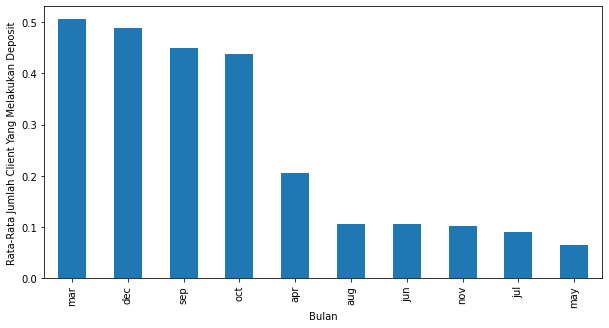

In [32]:
df.groupby('month').mean()['deposit'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Jumlah Client Yang Melakukan Deposit')
#menggunakan .mean() agar yang di-plot adalah rata-rata orang yang melakukan deposit (karena nilai deposit bernilai 1)

In [33]:
df['month_'] = df['month'].replace({
    'may' : 1, 'jul':2,
    'nov' :3, 'jun' : 4,
    'aug' : 5, 'apr' : 6,
    'oct' :7, 'sep' : 8,
    'dec' : 9, 'mar' :10
})

In [34]:
df.corr()['deposit'].sort_values()

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
marital_          0.051717
cons.conf.idx     0.054878
educ_             0.064668
job_              0.114374
contact_          0.144773
month_            0.219927
previous          0.230181
duration          0.405274
deposit           1.000000
Name: deposit, dtype: float64

> Kolom month berkorelasi sebesar 0.2 terhadap deposit (cukup signifikan). Berarti, ada bulan-bula ntertentu dimana client akan menyetujui untuk melakukan deposit pada bank

## Korelasi Deposit Dengan Jumlah Kontak Saat Campaign Berlangsung 

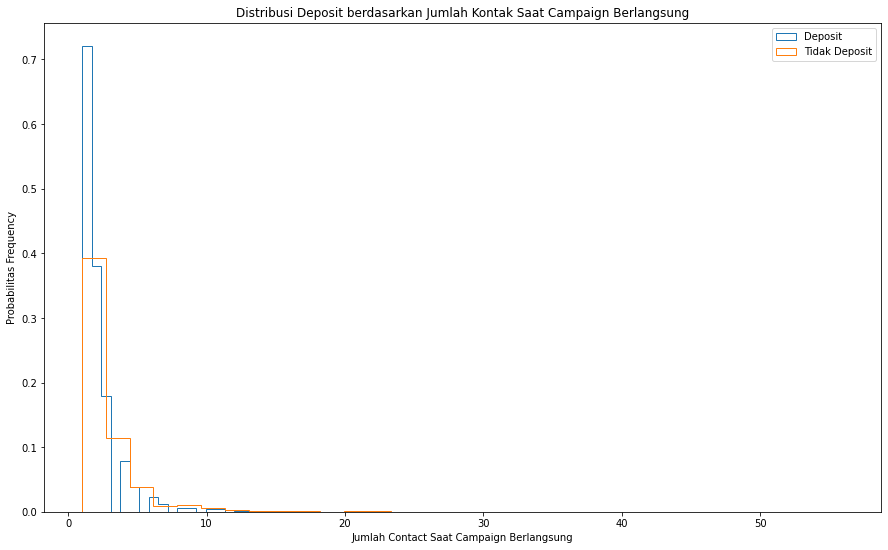

In [35]:
plt.figure(figsize=(15,9))

plt.hist(df[df['deposit'] == 1].campaign,
          histtype='step', label='Deposit', bins=32, density=True)
plt.hist(df[df['deposit'] == 0].campaign,
          histtype='step', label='Tidak Deposit',bins=32, density=True)
plt.title('Distribusi Deposit berdasarkan Jumlah Kontak Saat Campaign Berlangsung')
plt.xlabel('Jumlah Contact Saat Campaign Berlangsung')
plt.ylabel('Probabilitas Frequency')
plt.legend()

> Jika dilihat, campaign sebanyak 0-3x frekuensu client untuk melakukan deposit lebih banyak. Namun karena data nya imbalance dan terdistribusi right skew, maka hasil dari histogram ini tidak valid.

> Dilihat dari distribusi kolomnya, kebanyakan marketing melakukan campaign ke client sebanyak 1-2x saja selama campaign berlangsung.


## Korelasi Deposit Dengan Kepemilikan Kartu Kredit

Text(0, 0.5, 'Rata-Rata Jumlah Client Yang Melakukan Deposit')

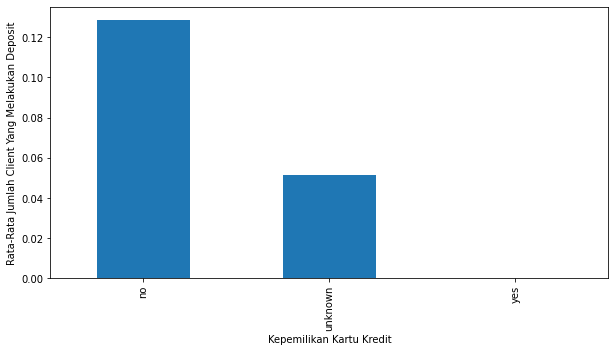

In [36]:
df.groupby('credit').mean()['deposit'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.xlabel('Kepemilikan Kartu Kredit')
plt.ylabel('Rata-Rata Jumlah Client Yang Melakukan Deposit')
#menggunakan .mean() agar yang di-plot adalah rata-rata orang yang melakukan deposit (karena nilai deposit bernilai 1)

In [37]:
df['credit_'] = df['credit'].replace({'yes' : 1, 'unknown' : 2,'no':3})
df.corr()['deposit'].sort_values()

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
marital_          0.051717
cons.conf.idx     0.054878
educ_             0.064668
credit_           0.099352
job_              0.114374
contact_          0.144773
month_            0.219927
previous          0.230181
duration          0.405274
deposit           1.000000
Name: deposit, dtype: float64

Jika diurutkan, kolom credit memiliki korelasi sebesar 0.1 (cukup signifikan). Artinya, client yang memiliki kartu kredit akan mempengaruhi keputusannya untuk melakukan deposit/tidak

## Korelasi Deposit Dengan Hutang Rumah

Text(0, 0.5, 'Rata-Rata Jumlah Client Yang Melakukan Deposit')

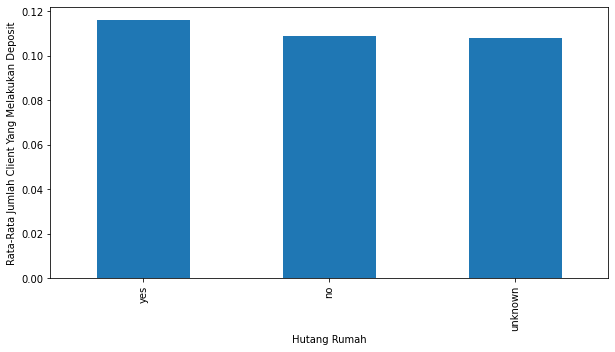

In [38]:
df.groupby('housing').mean()['deposit'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.xlabel('Hutang Rumah')
plt.ylabel('Rata-Rata Jumlah Client Yang Melakukan Deposit')
#mlihat jumlah rata-rata client yang melakukan deposit berdasarkan hutang rumah
#menggunakan .mean() agar yang di-plot adalah rata-rata orang yang melakukan deposit (karena nilai deposit bernilai 1)

In [39]:
df['housing_'] = df['housing'].replace({'yes' : 3, 'unknown' : 1,'no':2})
df.corr()['deposit'].sort_values()

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
housing_          0.011379
age               0.030399
marital_          0.051717
cons.conf.idx     0.054878
educ_             0.064668
credit_           0.099352
job_              0.114374
contact_          0.144773
month_            0.219927
previous          0.230181
duration          0.405274
deposit           1.000000
Name: deposit, dtype: float64

> Kolom housing hanya berkorelasi sebsar 0.01 terhadap deposit (kecil). Artinya, clinet yang memiliki cicilan rumah/tidak, tidak berpengaruh pada keputusan client untuk melakukan deposit/tidak

## Korelasi Deposit Dengan Hutang Pribadi

Text(0, 0.5, 'Rata-Rata Jumlah Client Yang Melakukan Deposit')

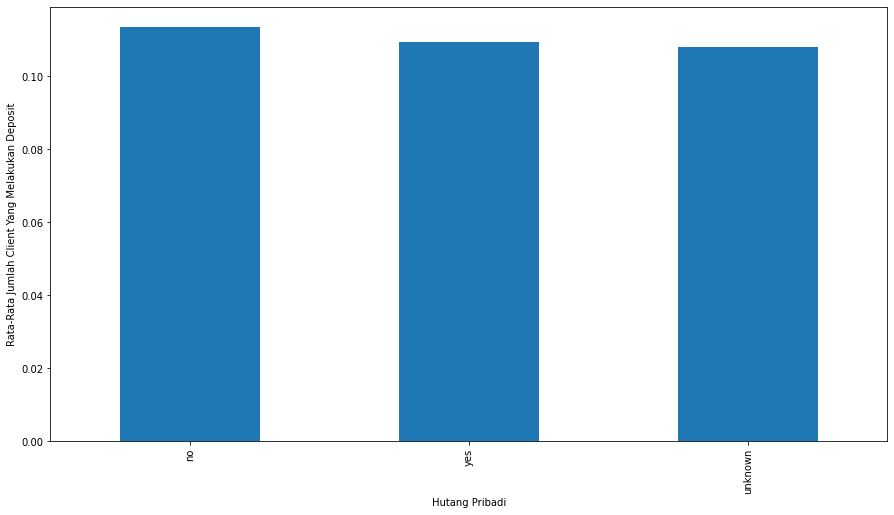

In [40]:
df.groupby('loan').mean()['deposit'].sort_values(ascending=False).plot(kind='bar',figsize=(15,8))
plt.xlabel('Hutang Pribadi')
plt.ylabel('Rata-Rata Jumlah Client Yang Melakukan Deposit')
#menggunakan .mean() agar yang di-plot adalah rata-rata orang yang melakukan deposit (karena nilai deposit bernilai 1)

In [41]:
df['loan_'] = df['loan'].replace({'yes' : 2, 'unknown' : 1,'no':3})
df.corr()['deposit'].sort_values()

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
loan_             0.005038
housing_          0.011379
age               0.030399
marital_          0.051717
cons.conf.idx     0.054878
educ_             0.064668
credit_           0.099352
job_              0.114374
contact_          0.144773
month_            0.219927
previous          0.230181
duration          0.405274
deposit           1.000000
Name: deposit, dtype: float64

> Kolom loan hanya berkontribusi sebesar 0.005 saja terhadap deposit ( sangat kecil). Artinya, ada/tidaknya hutang pribadi tidak akan ebrpengaruh pada keputusan client untuk dpeosit/tidak

## Checking on Missing Value

In [42]:
columns = df.columns.tolist()
# columns

In [43]:
#melakukan cek unique values pada semua kolom untuk mendeteksi missing values
uniques = {col: df[col].unique() for col in columns}
# uniques

> default, educational, housing, job, loan, marital = unknown memiliki value unknown, namun hal tersebut tidak bisa dianggap sebagai missing value karena banyaknya unknown pada masing-masing feature berbeda. Jika dilakukan imputasi/drop maka akan merubah distribusinya sehingga saya akan menagngap unknown ini sebagai data yang valid (bukan missing value)

> pdays = 999 adalah tanda ketika client tersebut `tidak dihubungi` sama sekali. Karena kolom pdays memiliki arti **jumlah hari setelah client terakhir kali dikontak** maka angka 0 memiliki arti bahwa client tersebut langsung dihubungi lagi (waktu kurang dari 1 hari). Karena itu angka 999 ini tidak dapat dilakukan imputasi/replace karena akan merubah makna dari setiap value yang ada pada kolom pdays. Langkah yang akan dilakukan memasukkan angka 999 ke dalam urutan nomor sebagai angka 0, dan merubah pemahaman dimana angka 0 = tidak pernah di kontak, 1 = dikontak pada `hari itu juga`. Kolom pdays akan memiliki pergeseran makna





## Cek Missing Value Lebih Jauh

In [44]:
df['housing_null'] = np.where(df.housing == 'unknown', 1, 0)
df['loan_null'] = np.where(df.loan == 'unknown', 1,0)
df['credit_null'] = np.where(df.credit == 'unknown', 1,0)
df['education_null'] = np.where(df.education == 'unknown', 1,0)
df['marital_null'] = np.where(df.marital == 'unknown', 1,0)
df['job_null'] = np.where(df.job == 'unknown', 1,0)

In [45]:
df[df.marital_null==1].tail(20)

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,collar,educ_,job_,marital_,contact_,month_,credit_,housing_,loan_,housing_null,loan_null,credit_null,education_null,marital_null,job_null
32811,34,admin.,unknown,university.degree,no,yes,yes,cellular,may,mon,56,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0,white collar,4,5,4,2,1,3,3,2,0,0,0,0,1,0
32815,34,admin.,unknown,university.degree,no,yes,no,cellular,may,mon,304,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0,white collar,4,5,4,2,1,3,3,3,0,0,0,0,1,0
32999,34,admin.,unknown,university.degree,no,yes,no,cellular,may,mon,447,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0,white collar,4,5,4,2,1,3,3,3,0,0,0,0,1,0
33315,35,blue-collar,unknown,basic.education,no,no,no,telephone,may,tue,81,5,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0,blue collar,1,1,4,1,1,3,2,3,0,0,0,0,1,0
33353,35,services,unknown,high.school,no,no,no,cellular,may,tue,516,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0,pink collar,2,2,4,2,1,3,2,3,0,0,0,0,1,0
34410,52,blue-collar,unknown,basic.education,no,no,no,cellular,may,thu,1180,1,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,1,blue collar,1,1,4,2,1,3,2,3,0,0,0,0,1,0
34423,30,student,unknown,basic.education,no,no,no,cellular,may,thu,155,1,999,2,failure,-1.8,92.893,-46.2,1.266,5099.1,0,unemployed,1,6,4,2,1,3,2,3,0,0,0,0,1,0
34698,52,blue-collar,unknown,basic.education,no,unknown,unknown,cellular,may,thu,610,3,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,0,blue collar,1,1,4,2,1,3,1,1,1,1,0,0,1,0
35876,29,admin.,unknown,university.degree,no,no,no,cellular,may,fri,264,2,999,1,failure,-1.8,92.893,-46.2,1.259,5099.1,0,white collar,4,5,4,2,1,3,2,3,0,0,0,0,1,0
36316,32,blue-collar,unknown,basic.education,no,yes,no,cellular,jun,mon,314,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,1,blue collar,1,1,4,2,4,3,3,3,0,0,0,0,1,0


> Berdasarkan data ini :: 
1. jika housing nya null, maka loan nya juga null. Berarti kolom housing null diwakilkan oleh loan null. (MNAR)
2. Jika credit nya null, education & job nya juga cenderung null (MNAR)
3. Missing value di marital adalah missing value yang tidak bergnatung dengan missing value yang lain (MCAR)


In [46]:
a = df[['housing','loan']].where(df['housing'] == 'unknown')
a.value_counts()
#kalau value housing missing, maka value loan juga missing (MNAR)

housing  loan   
unknown  unknown    990
dtype: int64

# 5. Data Preprocessing

## 5.1 Data Inference
Data Inference adalah data yang dianggap sebagai `data saat ini`, dimana data tsb akan dimasukkan menggunakan model yang sudah dibuat

In [47]:
df_inf = df.sample(5, random_state=15)
df_train_test = df.drop(df_inf.index)


df_train_test = df_train_test.reset_index(drop=True)
df_inf = df_inf.reset_index(drop=True)

In [48]:
X = df_train_test.drop('deposit', axis=1)
y = df_train_test['deposit']

In [49]:
X_trainval, X_testval, y_trainval, y_testval = train_test_split(X, y, test_size=0.2, random_state=15)

## 5.2 Handling Outliers
Outliers adalah data yang memiliki anomali dan perlu analisis lebih jauh untuk menentukan apakah data tersebut anomali/tidak.

Pada saat melakukan EDA, didapatkan insight : 
> Rata-rata umur pada dataset ini adalah 40 tahun, perlu di cek max value pada umur

> kolom campaign memiliki nilai max yang jauh dari nilai rata-ratanya, hal ini perlu di cek lebih jauh.

> kolom nr.employed memiliki nilai 75% dan max yang sama, kemungkinan data ini adalah data outliers yang sudah dilakukan `capping`

> kolom durasi hanya berarti ketika telepon di angkat, kolom ini tidak terlalu berfungsi dalam dataset ini

> rata-rata tiap customer dikontak oleh marketing 2x (kolom campaign), perlu di cek max value pada kolom campaign

> pdays 999 adalah missing value dimana tidak terdapat data pada pdays

Maka disimpulkan 

1. Kemungkinan terdapat outliers pada kolom umur & campaign
2. agar tidak merusak model, sebaiknya data yang menumpuk pada kolom nr.employed dihilangkan.
2. angka 999 pada pdays bukan outliers

### 5.2.1 Age Outliers

In [50]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,educ_,job_,marital_,contact_,month_,credit_,housing_,loan_,housing_null,loan_null,credit_null,education_null,marital_null,job_null
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,2.542172,3.503205,1.679518,1.634748,3.036273,2.791128,2.499806,2.800233,0.024036,0.024036,0.208726,0.042027,0.001942,0.008012
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,1.305421,1.873319,0.889474,0.481507,2.061041,0.406686,0.545967,0.456002,0.153163,0.153163,0.406403,0.200653,0.044029,0.089152
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,2.000000,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,4.000000,5.000000,3.000000,2.000000,5.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,6.000000,7.000000,4.000000,2.000000,10.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
X_trainval.age.describe()

count    32946.000000
mean        40.015146
std         10.404033
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

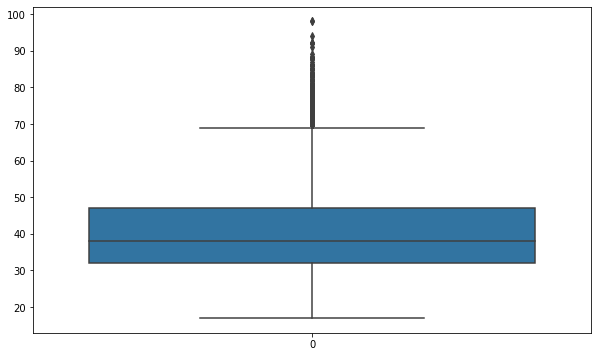

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_trainval['age'])

> Berdasarkan boxplot, dirasa tidak ada jarak yang terlalu jauh antar usia.

In [53]:
age_above_80 = X_trainval[X_trainval['age'] > 80]
age_above_80['collar'].mode()

0    retired
dtype: object

> Dengan pertimbangan kolom pekerjaan, terdapat orang yang memiliki title `retirement` yang dimana orang tersebut sudah lansia. Bisa dianggap bahwa kolom usia ini bukanlah outliers, melainkan merupakan hal yang normal. Begitupula data dari [sumber](https://ourworldindata.org/life-expectancy#:~:text=The%20United%20Nations%20estimate%20a,life%20expectancy%20of%2072.3%20years.) dimana usia bisa saja mencapai 80-an. Berdasarkan analisis, orang yang berusia >80 kebanyakan retired.

In [54]:
age_above_80[age_above_80['collar']=='blue collar']

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,collar,educ_,job_,marital_,contact_,month_,credit_,housing_,loan_,housing_null,loan_null,credit_null,education_null,marital_null,job_null
38513,81,housemaid,married,basic.education,no,yes,no,cellular,oct,wed,246,2,999,0,nonexistent,-3.4,92.431,-26.9,0.724,5017.5,blue collar,1,1,1,2,7,3,3,3,0,0,0,0,0,0
39406,82,housemaid,divorced,basic.education,no,unknown,unknown,cellular,apr,tue,139,6,999,0,nonexistent,-1.8,93.749,-34.6,0.638,5008.7,blue collar,1,1,2,2,6,3,1,1,1,1,0,0,0,0
40040,83,housemaid,divorced,basic.education,no,yes,yes,cellular,jul,tue,257,1,999,3,failure,-1.7,94.215,-40.3,0.797,4991.6,blue collar,1,1,2,2,2,3,3,2,0,0,0,0,0,0
39471,85,housemaid,married,basic.education,unknown,yes,no,cellular,apr,tue,167,1,6,2,success,-1.8,93.749,-34.6,0.642,5008.7,blue collar,1,1,1,2,6,2,3,3,0,0,1,0,0,0
38321,85,housemaid,divorced,basic.education,unknown,yes,no,telephone,oct,fri,181,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,blue collar,1,1,2,1,7,2,3,3,0,0,1,0,0,0
39472,85,housemaid,married,basic.education,unknown,no,no,cellular,apr,tue,166,1,999,0,nonexistent,-1.8,93.749,-34.6,0.642,5008.7,blue collar,1,1,1,2,6,2,2,3,0,0,1,0,0,0
40213,82,housemaid,divorced,basic.education,no,no,no,cellular,jul,wed,316,1,999,0,nonexistent,-1.7,94.215,-40.3,0.881,4991.6,blue collar,1,1,2,2,2,3,2,3,0,0,0,0,0,0
39470,85,housemaid,married,basic.education,unknown,no,no,cellular,apr,tue,175,6,6,1,success,-1.8,93.749,-34.6,0.642,5008.7,blue collar,1,1,1,2,6,2,2,3,0,0,1,0,0,0


In [55]:
print('rata-rata yang berusia >80 adalah ' , len(age_above_80)/len(X_trainval))
print(f'range usia pada data train adalah  {X_trainval["age"].min()} sampai  {X_trainval["age"].max()}')

rata-rata yang berusia >80 adalah  0.0027317428519395373
range usia pada data train adalah  17 sampai  98


> Terdapat 8 orang yang bekerja sebagai blue collar (0.002%) dimana pekerjaan aslinya adalah housemaid. Hal ini merupakan hal yang wajar karena orang-orang tersebut hanya lulusan sekolah `basic` dan mendedikasikan pekerjaannya menjadi housemaid

### 5.2.2 Campaign Outliers

In [56]:
X_trainval.campaign.describe()

count    32946.000000
mean         2.572330
std          2.791898
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [57]:
X_trainval.campaign.value_counts()

1     14125
2      8457
3      4261
4      2110
5      1276
6       783
7       502
8       306
9       226
10      183
11      148
12      102
13       75
14       55
17       52
16       47
15       44
18       27
20       24
19       18
21       16
23       15
22       15
24       11
27        9
29        9
28        8
25        7
31        5
32        4
35        4
26        4
33        4
30        3
43        2
40        2
34        2
42        2
56        1
39        1
41        1
Name: campaign, dtype: int64

> Terdapat seorang client yang dihubungi sebanyak >30x, mungkin mereka adalah client yang berpotensi untuk melkaukan deposit

In [58]:
campaign_above_30 = X_trainval[X_trainval['campaign'] >30]
print(f'terdapat {len(campaign_above_30)} client yang di hubungi > 30x selama campaign berlangsung dari total {len(X_trainval)} client\n')
#
campaign_above_30.duration.unique()
#client yang ditelepon > 30x adalah client yang mengangkat telepon selama >10detik, sehingga perusahaan menganggap bahwa client tersebut berpotensi karena sudah mengangkat telefon

terdapat 28 client yang di hubungi > 30x selama campaign berlangsung dari total 32946 client



array([ 21,   9,  13,  16,  65,  35,  34,  18, 261, 147,  79,  14,  44,
        30, 102,  66,  25, 124,  29,  36,  43,  51,  33,  77])

In [59]:
max_campaign = X_trainval[X_trainval['campaign'] >50]
max_campaign.duration.unique()
#dan client yang dihubungi >50x karena dia mengangkat tlp dengan durasi 261 detik (client mengangkat tlp)

array([261])

> Saya menimpulkan bahwa kolom campaign juga tidak memiliki outliers.

### 5.2.3 nr.employed

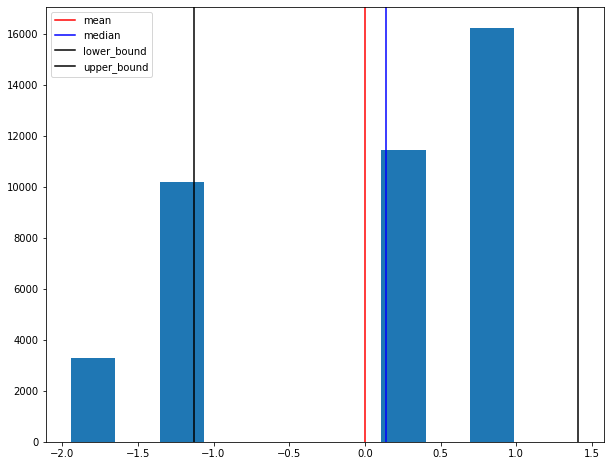

In [60]:
df['nr.employed'] = PowerTransformer().fit_transform(df[['nr.employed']])
plt.figure(figsize=(10,8))
plt.hist(df['nr.employed']);
plt.axvline(df['nr.employed'].mean(), color='red', label='mean')
plt.axvline(df['nr.employed'].median(), color='blue',label = 'median')

Q1 , Q2, Q3 = np.quantile(df['nr.employed'], q=[.25,.50,.75])
IQR = Q3 - Q2
upper_bound = 1.5*IQR + Q2
lower_bound = Q2 - 1.5*IQR
plt.axvline(lower_bound, color = 'k', label = 'lower_bound')
plt.axvline(upper_bound, color='k', label = 'upper_bound')
plt.legend()

> Tidak ada data nr.employed yang berada pada luar batas outliers. Data bukan outliers yang perlu di handle

## 5.3 Missing Values
Data set ini tidak memiliki missing value. Keanehan pada data (kolom pdays) akan di handle dengan replacement value (penjelasan lebih lengkap ada di EDA)


In [61]:
pdays_norm=FunctionTransformer(lambda x : (x+1).replace(1000,0))

## 5.4 Feature Engineering

Feature yang digunakan adalah **previous, month_, contact_, job_, cons.price.idx,.emp.var.rate, euribor3m, pdays, nr.employed, credit_**. Feature ini dipilih karena berdasarkan EDA mereka mempunyai korelasi yang cukup besar (>0.05). Sedangkan feature lainnya tidak dipakai karena nilai korelasinya sangat kecil dan jika dipaksakan untuk di train pada model ditakutkan menyebabkan model menjadi kurang valid


In [62]:
scaling_pipe = Pipeline(steps=[('scaler', MinMaxScaler())])

prep_pipeline = ColumnTransformer([
      ('pdays_norm' , pdays_norm , ['pdays']),
     ('scaling', scaling_pipe, ['previous','month_','contact_','job_','cons.price.idx','emp.var.rate','euribor3m','nr.employed','credit_'])
])

Pada proses kali ini, data kategorikal sudah dirubah menjadi data numeric berdasarkan urutan korelasinya (dilakukan di EDA) sehingga hanya perlu dilakukan scaling menggunakan MinMaxScaler.

# 6. Model Definition
Case kali ini adalah case klasifikasi, sehingga model yang digunakan adalah model LogisticRegression, SVM (menggunakan SVC) , DecisionTree ( DecisionTreeClassifier) , RandomForest (RandomForestClassifier), KNN , NaiveBayes, dan GradientBoostingClassifier.

- Support Vector Model = SVC untuk melakukan ekspansi hyperparameter yang lbeih beragam agar hasil dari model lebih memuaskan.
- Other Algorythm = Gradientboost untuk meminimalisir bias error dari model

> Pipeline untuk semua model

In [63]:
pipe_lr = Pipeline([
                     ('prep', prep_pipeline),
                     ('lr', LogisticRegression(random_state=15))
                     ])

pipe_svm = Pipeline([
                     ('prep', prep_pipeline),
                     ('svm', SVC(max_iter=5_000,random_state=15)) #max_iter = 5000 agar proses fit tidak terlalu lama
                     ])

pipe_dt = Pipeline([
                     ('prep', prep_pipeline),
                     ('dt', DecisionTreeClassifier(random_state=15))
                     ])

pipe_rf = Pipeline([
                     ('prep', prep_pipeline),
                     ('rf', RandomForestClassifier(random_state=15))
                     ])

pipe_knn = Pipeline([
                     ('prep', prep_pipeline),
                     ('knn', KNeighborsClassifier())
                     ])

pipe_nb = Pipeline([
                     ('prep', prep_pipeline),
                     ('nb', MultinomialNB())          
                     ])

pipe_gb = Pipeline([
                     ('prep', prep_pipeline),
                     ('gb', GradientBoostingClassifier(random_state=15))          
                     ])

> Pipeline untuk semua parameter. Semua parameter yang di-set berdasarkan [scikitlearn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

In [77]:
#parameter untuk hyperparameter semua model

param_lr = {
    'lr__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'lr__C' : [0.01, 0.1, 1],
    'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


param_svm = {
    'svm__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'svm__C': [0.01, 0.1, 1],
    'svm__degree': [2,3,5]
}


param_dt = {
    'dt__criterion' : ['gini', 'entropy'],
    'dt__max_depth': [3,5,10]
}

param_rf = {
    'rf__n_estimators' : [100,200],
    'rf__criterion' : ['gini', 'entropy'],
    'rf__max_depth': [5,10, None]
}


param_knn = {
    'knn__n_neighbors' : [3,5,8],
    'knn__weights' : ['uniform', 'distance'],
    'knn__p' : [1,2]
}


param_nb = {
    'nb__alpha' : [0,1]
}

param_gb = {
    'gb__loss' : ['deviance', 'exponential'],
    'gb__n_estimators' : [100,200],
    'gb__learning_rate' : [0.1, 1],
    'gb__max_depth' : [5,None]
}

# Model Training

## Logistic Regression Model

In [65]:
pipe_lr.fit(X_trainval, y_trainval)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pdays_norm',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f11c5187320>),
                                                  ['pdays']),
                                                 ('scaling',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous', 'month_',
                                                   'contact_', 'job_',
                                                   'cons.price.idx',
                                                   'emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'credit_'])])),
                ('lr', LogisticRegression(random_state=15))])

## SVM Model

In [66]:
pipe_svm.fit(X_trainval, y_trainval) #1m

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pdays_norm',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f11c5187320>),
                                                  ['pdays']),
                                                 ('scaling',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous', 'month_',
                                                   'contact_', 'job_',
                                                   'cons.price.idx',
                                                   'emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'credit_'])])),
                ('svm', SVC(max_iter=5000, random_state=15))])

## Decision Tree Model

In [67]:
pipe_dt.fit(X_trainval, y_trainval)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pdays_norm',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f11c5187320>),
                                                  ['pdays']),
                                                 ('scaling',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous', 'month_',
                                                   'contact_', 'job_',
                                                   'cons.price.idx',
                                                   'emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'credit_'])])),
                ('dt', DecisionTreeClassifier(random_state=15))])

## Random Forest Model

In [68]:
pipe_rf.fit(X_trainval, y_trainval)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pdays_norm',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f11c5187320>),
                                                  ['pdays']),
                                                 ('scaling',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous', 'month_',
                                                   'contact_', 'job_',
                                                   'cons.price.idx',
                                                   'emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'credit_'])])),
                ('rf', RandomForestClassifier(random_state=15))])

## KNN Model

In [69]:
pipe_knn.fit(X_trainval, y_trainval)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pdays_norm',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f11c5187320>),
                                                  ['pdays']),
                                                 ('scaling',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous', 'month_',
                                                   'contact_', 'job_',
                                                   'cons.price.idx',
                                                   'emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'credit_'])])),
                ('knn', KNeighborsClassifier())])

## Naive Bayes (MultinomialNB) Model

In [70]:
pipe_nb.fit(X_trainval, y_trainval)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pdays_norm',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f11c5187320>),
                                                  ['pdays']),
                                                 ('scaling',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous', 'month_',
                                                   'contact_', 'job_',
                                                   'cons.price.idx',
                                                   'emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'credit_'])])),
                ('nb', MultinomialNB())])

## GradientBoosting Model

In [78]:
pipe_gb.fit(X_trainval, y_trainval) #12s

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pdays_norm',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f11c5187320>),
                                                  ['pdays']),
                                                 ('scaling',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous', 'month_',
                                                   'contact_', 'job_',
                                                   'cons.price.idx',
                                                   'emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'credit_'])])),
                ('gb', GradientBoostingClassifier(random_state=15))])

# 8. Model Evaluation

## 8.1 Cross Validation
Scoring yang digunakan adalah roc_auc agar model dapat memisahkan kedua kelas lebih baik. Mengingat bahwa data kita sangat imbalance, maka roc_auc merupakan model yang cukup baik agar model dapat belajar untuk mengklasifikasikan kedua kelas. Untuk mendapatkan model yang terbaik, akan digunakan `cross_val_score` nengan fold sebanyak 5x

Sumber : https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#:~:text=The%20Area%20Under%20the%20Curve,the%20positive%20and%20negative%20classes.

In [72]:
models = ['LogisticRegression', 'SVM', 'DecisionTree','RandomForest','KNN','NaiveBayes','GradientBoost']

In [73]:
### LOGISTIC REGRESSION ###
score_lr = cross_val_score(pipe_lr, X_trainval, y_trainval, cv=5, scoring="roc_auc")

### SVM ###
score_svm = cross_val_score(pipe_svm, X_trainval, y_trainval, cv=5, scoring="roc_auc")

### DECISION TREE ###
score_dt = cross_val_score(pipe_dt, X_trainval, y_trainval, cv=5, scoring="roc_auc")

### RANDOM FOREST ###
score_rf = cross_val_score(pipe_rf, X_trainval, y_trainval, cv=5, scoring="roc_auc")

###  K-NEAREST NEIGHBOR ###
score_knn = cross_val_score(pipe_knn, X_trainval, y_trainval, cv=5, scoring="roc_auc")

### NAIVE BAYES ###
score_nb = cross_val_score(pipe_nb, X_trainval, y_trainval, cv=5, scoring="roc_auc")

### GRADIENT BOOSTING ###
score_gb = cross_val_score(pipe_gb, X_trainval, y_trainval, cv=5, scoring="roc_auc")

In [74]:
#mencari nilai rata-rata dan standar deviasi dari cross_val_score dengan scoring roc_auc
roc_auc_mean_train = [np.mean(score_lr), np.mean(score_svm), np.mean(score_dt), np.mean(score_rf), np.mean(score_knn),
                np.mean(score_nb), np.mean(score_gb)]
roc_auc_std_train = [np.std(score_lr), np.std(score_svm), np.std(score_dt), np.std(score_rf), np.std(score_knn),
                np.std(score_nb), np.std(score_gb)]

In [75]:
#membuat dataframe untuk cross validation 
cv_roc_auc_train = pd.DataFrame({'Models' : models, 'roc_auc_mean_train' : roc_auc_mean_train, 'roc_auc_std_train': roc_auc_std_train})
cv_roc_auc_train.sort_values(by='roc_auc_mean_train', ascending=False).reset_index(drop=True)

,Models,roc_auc_mean_train,roc_auc_std_train
0,GradientBoost,0.796262,0.008797
1,LogisticRegression,0.784988,0.011397
2,NaiveBayes,0.774310,0.013988
3,RandomForest,0.758189,0.009358
4,SVM,0.734617,0.029296
5,KNN,0.733357,0.007990
6,DecisionTree,0.639770,0.008514


> Berdasarkan cross_val_score, mean dari ke-7 model, mean recall yang paling tinggi adalah model **GradientBoost**.  Maka dari itu saya memutuskan untuk memprediksi data test akan menggunakan model **GradientBoost** dengan menentukan hyperparameternya 

> Model yang bagus adalah model dengan mean tertinggi dan std yang rendah

## 8.2 GridSearchCV
GridSearchCV dilakukan untuk menemukan Hyperparameter Tuning untuk model GradientBoost sebagai model terbaik

In [79]:
grid_gb = GridSearchCV(pipe_gb, param_gb, cv=2, verbose=True, scoring='roc_auc').fit(X_trainval, y_trainval) #cv=5 up to 40m ON VSC

Fitting 2 folds for each of 16 candidates, totalling 32 fits


In [80]:
print('Best parameter untuk model Gradient Boost adalah\n',grid_gb.best_params_)

Best parameter untuk model Gradient Boost adalah
 {'gb__learning_rate': 0.1, 'gb__loss': 'deviance', 'gb__max_depth': 5, 'gb__n_estimators': 100}


In [81]:
best_gb = grid_gb.best_estimator_

## 8.3 Predict Test
Setelah mendapatkan Hyperparameter terbaik, maka model dengan parameter tersebut akan digunakan untuk memprediksi data test

In [82]:
y_pred_train_gb = best_gb.predict(X_trainval)
y_pred_test_gb = best_gb.predict(X_testval)

In [83]:
print('Classification Report Gradient Boost Train set\n', classification_report(y_trainval, y_pred_train_gb))
print('\nClassification Report Gradient Boost Test set\n', classification_report(y_testval, y_pred_test_gb))

Classification Report Gradient Boost Train set
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     29216
           1       0.74      0.31      0.44      3730

    accuracy                           0.91     32946
   macro avg       0.83      0.65      0.70     32946
weighted avg       0.90      0.91      0.89     32946


Classification Report Gradient Boost Test set
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7328
           1       0.63      0.27      0.38       909

    accuracy                           0.90      8237
   macro avg       0.77      0.63      0.66      8237
weighted avg       0.88      0.90      0.88      8237



In [98]:
confusion_matrix(y_testval, y_pred_test_gb)

array([[7184,  144],
       [ 661,  248]])

In [5]:
confusion_mat_gb_test = confusion_matrix(y_testval, y_pred_test_gb)
sns.heatmap(confusion_mat_gb_test, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test Set')

NameError: name 'confusion_matrix' is not defined

In [4]:
fig, ax = plt.subplots(ncols=2)
plot_roc_curve(best_gb, X_trainval, y_trainval, ax=ax, name='Training')
# plot_roc_curve(best_gb, X_testval, y_testval, ax=ax, name='Test')
plt.title('ROC AUC Score')


NameError: name 'plt' is not defined

> Classification Report : 
>> Model masih agak **overfit** pada train test. Hal ini dapat dilihat dari nilai keseluruhan (precision, recall, dan f1 score) pada data trainset lebih tinggi daripada nilai precision, recall, dan f1 score di test set. 
Model masih kurang bagus untuk memprediksi data pada kelas 1, namun hal ini cukup sederhana untuk memprediksi kedua kelas dikarenakan data yang imbalance antara data kelas 0 dan 1


> Confussion Matrix : 
>> Pada testset, model GradientBoost  memprediksi 7184+248 = 7.432 data yang benar dan 661+144 = 805 data yang salah (total = 8.237) atau sekitar 90% data benar

> ROC AUC
>> Skorline AUC untuk GradientBoost masih diatas 0.5 sehingga model masih cukup bagus, namun berdasarkan skornya roc_auc pada traintest masih lebih besar dari test set (Overfit)

### 8.3.3 Melihat hasil prediksi dengan actual data

In [86]:
gb_result = pd.DataFrame(np.array([y_testval, y_pred_test_gb]).T, columns=['Actual','Predicted_gb'])
gb_result

,Actual,Predicted_gb
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
8232,0,0
8233,0,0
8234,0,0
8235,0,0


In [102]:
gb_result.value_counts()

Actual  Predicted_gb
0       0               7184
1       0                661
        1                248
0       1                144
dtype: int64

> Dari dataframe diatas, model GradientBoost `terlihat` gagal dalam memprediksi kelas yang Actualnya adalah 1 sebanyak 661x (lebih banyak salah memprediksi kelas 1), namun hanya gagal 144x dalam memprediksi kelas yang actualnya adalah 0. Hal ini cukup menjelaskan `classification report` dimana model memang lemah untuk memprediksi kelas 1

## 8.4 Predicting with baseline model
Memprediksi data menggunakan 6 model lain yang tidak ditunning 

In [88]:
### LOGISTIC REGRESSION ###
y_pred_train_lr = pipe_lr.predict(X_trainval)
y_pred_test_lr = pipe_lr.predict(X_testval)

### DECISION TREE ###
y_pred_train_dt = pipe_dt.predict(X_trainval)
y_pred_test_dt = pipe_dt.predict(X_testval)

### NAIVE BAYES ###
y_pred_train_nb = pipe_nb.predict(X_trainval)
y_pred_test_nb = pipe_nb.predict(X_testval)

### SUPPORT VECTOR MACHINE ###
y_pred_train_svm = pipe_svm.predict(X_trainval)
y_pred_test_svm = pipe_svm.predict(X_testval)

### RANDOM FOREST  ###
y_pred_train_rf = pipe_rf.predict(X_trainval)
y_pred_test_rf = pipe_rf.predict(X_testval)

### KNN ###
y_pred_train_knn = pipe_knn.predict(X_trainval)
y_pred_test_knn = pipe_knn.predict(X_testval)

### 8.4.1 Evaluate

In [89]:
roc_auc_score_baseline_lr_train = roc_auc_score(y_trainval, y_pred_train_lr)
roc_auc_score_baseline_lr_test = roc_auc_score(y_testval, y_pred_test_lr)

roc_auc_score_baseline_dt_train = roc_auc_score(y_trainval, y_pred_train_dt)
roc_auc_score_baseline_dt_test = roc_auc_score(y_testval, y_pred_test_dt)

roc_auc_score_baseline_nb_train= roc_auc_score(y_trainval, y_pred_train_nb)
roc_auc_score_baseline_nb_test = roc_auc_score(y_testval, y_pred_test_nb)

roc_auc_score_baseline_svm_train = roc_auc_score(y_trainval, y_pred_train_svm)
roc_auc_score_baseline_svm_test = roc_auc_score(y_testval, y_pred_test_svm)

roc_auc_score_baseline_rf_train = roc_auc_score(y_trainval, y_pred_train_rf)
roc_auc_score_baseline_rf_test = roc_auc_score(y_testval, y_pred_test_rf)

roc_auc_score_baseline_knn_train = roc_auc_score(y_trainval, y_pred_train_knn)
roc_auc_score_baseline_knn_test=  roc_auc_score(y_testval, y_pred_test_knn)

In [90]:
models_ = ['Logistic_Regression','Decision_Tree','Naive_Bayes','Support Vector Machine'
            , 'Random_Forest', 'KNN']

In [91]:
roc_auc_baseline_train = [roc_auc_score_baseline_lr_train,roc_auc_score_baseline_dt_train,
                        roc_auc_score_baseline_nb_train, roc_auc_score_baseline_svm_train,
                        roc_auc_score_baseline_rf_train, roc_auc_score_baseline_knn_train]

roc_auc_baseline_test = [roc_auc_score_baseline_lr_test,roc_auc_score_baseline_dt_test,
                        roc_auc_score_baseline_nb_test, roc_auc_score_baseline_svm_test,
                        roc_auc_score_baseline_rf_test, roc_auc_score_baseline_knn_test]

In [92]:
pd.DataFrame({'Models' : models_, 'train_roc_auc_baseline' : roc_auc_baseline_train, 
            'test_roc_auc_baseline' : roc_auc_baseline_test}).sort_values(by='test_roc_auc_baseline',ascending=False).reset_index(drop=True)

,Models,train_roc_auc_baseline,test_roc_auc_baseline
0,KNN,0.672642,0.641780
1,Random_Forest,0.723555,0.634536
2,Decision_Tree,0.711528,0.615075
3,Naive_Bayes,0.596851,0.596463
4,Support Vector Machine,0.594187,0.593150
5,Logistic_Regression,0.580189,0.576653


Tabel diatas adalah tabel skor roc_auc dari model baseline yang tidak dilakukan tunning terhadap datatest dan data train. Hasilnya semua model lebih rendah dibanding dengan GradientBoost (0.82) yang ditunning.

# 9. Model Inference
Model Inference adalah menguji model dengan data yang terpisah dari trainset/testset. Biasanya data yang digunakan adalah data `terkini` 

In [93]:
df_inf1 = df_inf.drop('deposit', axis=1)
df_inf2 = df_inf['deposit']

In [94]:
inf_pred_rf = pipe_rf.predict(df_inf1)
inf_pred_rf_df = pd.DataFrame(inf_pred_rf, columns = ['predict_rf'])


inf_pred_lr = pipe_lr.predict(df_inf1)
inf_pred_lr_df = pd.DataFrame(inf_pred_lr, columns = ['predict_lr'])


inf_pred_nb = pipe_nb.predict(df_inf1)
inf_pred_nb_df = pd.DataFrame(inf_pred_nb, columns = ['predict_nb'])


inf_pred_svm = pipe_svm.predict(df_inf1)
inf_pred_svm_df = pd.DataFrame(inf_pred_svm, columns = ['predict_svm'])


inf_pred_knn = pipe_knn.predict(df_inf1)
inf_pred_knn_df = pd.DataFrame(inf_pred_knn, columns = ['predict_knn'])



inf_pred_dt = pipe_dt.predict(df_inf1)
inf_pred_dt_df = pd.DataFrame(inf_pred_dt, columns = ['predict_dt'])

In [95]:
inf_pred_df = pd.concat([inf_pred_rf_df, inf_pred_lr_df,
                         inf_pred_nb_df, inf_pred_svm_df,
                         inf_pred_knn_df,inf_pred_dt_df], axis=1)

In [96]:
pd.concat([df_inf2,inf_pred_df], axis=1)
#melihat actual (deposit) dengan hasil predict model random forest

,deposit,predict_rf,predict_lr,predict_nb,predict_svm,predict_knn,predict_dt
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


> Dapat dilihat bahwa dari ke-7 model, semua model gagal dalam memprediksi kelas 1 . Hal ini dapat dijelaskan melalui  `classification report` yang menunjukkan nilai yang kecil pada kelas 1, yang berarti model kruang bagus untuk memprediksi dengan data training kelas 1

# 10. Kesimpulan

## Overall Data
Data yang digunakan tidak seimbang, terlalu banyak data yang memprediksi client yang tidak subscribe deposit.
Tidak ada missing value pada dataset, namun banyak kategori `unknown` dan value ynag di set sangat tinggi `999`.
Tidak ditemukan outliers pada dataset kali ini
Fitur yang digunakan pada model ini adalah fitur yang memiliki korelasi cukup tinggi (>0.5) dengan target, yaitu : previous, month, contact, job, cons.price.idx,.emp.var.rate, euribor3m, pdays, nr.employed, credit


## Model Result
Model ini di evaluasi dengan menggunakan `cross_val_score` scoring roc_auc dengan 5x fold  **cukup buruk**. Hasilnya kedua model overfit. Model yang dibuat tidak dapat memprediksi client yang akan melakukan subscribe deposit dengan baik karena data yang didapatkan imbalance (kebanyakan data yang dipelajari adalah target yang tidak subscribe, sehingga model kurang mahir dalam mempelajari target yang subscribe).

Dari ke-7 model yang diprediksi, model yang paling tinggi nilai roc_auc pada Testsetnya adalah :
1. GradientBoost = 0.79
2. LogisticRegression = 0.78
3. NaiveBayes = 0.77
4. RandomForest = 0.75
5. SVM = 0.73
6. KNN = 0.73
7. DecisionTree = 0.63



## Best Model
Dari nilai `cross_val_score` dengan scoring roc_auc, nilai roc_auc yang paling tinggi adalah Model **GradientBoost**. Sehingga Data testset & inference akan dipredict dnegan Model GradientBoost yang sudah ditunning.

Tunning dilakukan dengan GridSearchCV sebanyak 2fold dan menghasilkan hyperparameter : 
1. learning_rate: 0.1, 
2. loss: 'deviance, 
3. max_depth: 5,
4. n_estimators': 100


## Slight Conclusion 
Model GradientBoost memiliki roc_auc yang cukup tinggi (0.8). Dalam dataset kali ini sebaiknya di maximalkan pada nilai `recall` untuk meminimalisir nilai False Negative (Realitanya melakukan deposit, tapi terprediksi tidak deposit))